In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('data.csv')

x=data.drop(columns=['id', 'diagnosis']).values
y=data['diagnosis'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

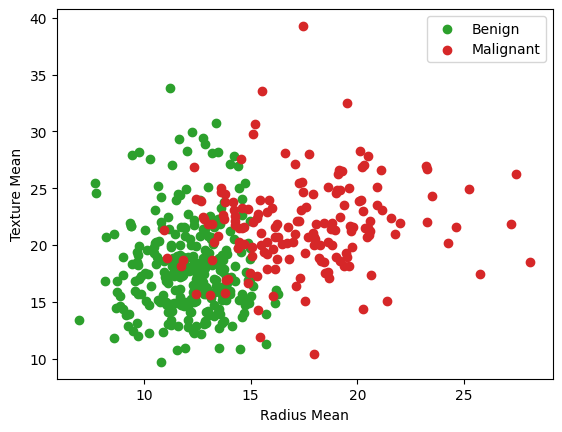

In [11]:
plt.scatter(x_train[y_train=='B',0], x_train[y_train=='B',1], color='tab:green', label='Benign')
plt.scatter(x_train[y_train=='M',0], x_train[y_train=='M',1], color='tab:red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

In [12]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x2-x1)**2)

In [13]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y

    def predict(self, new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)
    
    def predict_class(self, new_point):
        distances = [euclidean_distance(point, new_point) for point in self.x_train]
        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common

In [14]:
knn=KNN(7)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
accuracy=np.mean(predictions==y_test)*100
print(f"Accuracy: {accuracy:>2f}%")

Accuracy: 60.526316%


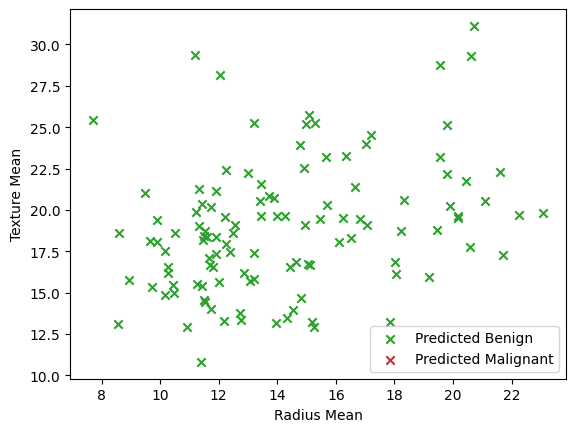

In [15]:
plt.scatter(x_test[predictions=='B',0],x_test[predictions=='B',1],color='tab:green', label='Predicted Benign', marker='x')
plt.scatter(x_test[predictions=='M',0],x_test[predictions=='M',1],color='tab:red',label='Predicted Malignant', marker='x')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()
